In [1]:
import fsspec
import xradar
import xarray as xr
from datatree import open_datatree
import s3fs
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [2]:
fs = s3fs.S3FileSystem(anon=True,
                       client_kwargs=dict(endpoint_url="https://js2.jetstream-cloud.org:8001/"))


## Open whole Datatree

In [8]:
fmap = s3fs.S3Map("pythia/test.zarr/", s3=fs)

In [9]:
%%time
ds_dt = open_datatree(fmap, engine='zarr')

CPU times: user 28.4 s, sys: 239 ms, total: 28.7 s
Wall time: 47 s


In [13]:
list(ds_dt.children)

['sweep_0',
 'sweep_1',
 'sweep_2',
 'sweep_3',
 'sweep_4',
 'sweep_5',
 'sweep_6',
 'sweep_7',
 'sweep_8',
 'sweep_9']

In [15]:
ds_dt['sweep_0'].ds

<xarray.DatasetView>
Dimensions:            (times: 72, azimuth: 720, range: 994)
Coordinates:
    altitude           float64 ...
  * azimuth            (azimuth) float64 0.25 0.75 1.25 ... 358.8 359.2 359.8
    latitude           float64 ...
    longitude          float64 ...
  * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
    spatial_ref        int64 ...
  * times              (times) datetime64[ns] 2023-04-07T00:00:25.776000 ... ...
    x                  (times, azimuth, range) float64 ...
    y                  (times, azimuth, range) float64 ...
    z                  (times, azimuth, range) float64 ...
Data variables: (12/19)
    DBTH               (times, azimuth, range) float32 ...
    DBZH               (times, azimuth, range) float32 ...
    DB_DBTE8           (times, azimuth, range) int16 ...
    DB_DBZE8           (times, azimuth, range) int16 ...
    DB_HCLASS          (times, azimuth, range) int16 ...
    KDP                (times, azimuth, range) float32 ...
    ...                 ...
    follow_mode        (times) <U7 ...
    prt_mode           (times) <U7 ...
    sweep_fixed_angle  (times) float64 ...
    sweep_mode         (times) <U20 ...
    sweep_number       (times) int64 ...
    time               (times, azimuth) datetime64[ns] ...

## Open single sweep

In [20]:
fmap = s3fs.S3Map("pythia/test.zarr/sweep_0", s3=fs)

In [21]:
%%time
ds = xr.open_zarr(fmap)

CPU times: user 967 ms, sys: 8.4 ms, total: 976 ms
Wall time: 6.59 s


In [25]:
%%time
ds.isel(times=0).DBZH.values

CPU times: user 137 ms, sys: 7.32 ms, total: 144 ms
Wall time: 569 ms


array([[-32. , -32. , -32. , ..., -32. , -32. , -32. ],
       [-32. , -32. , -32. , ..., -32. , -32. , -32. ],
       [-32. , -32. , -32. , ..., -32. , -32. , -32. ],
       ...,
       [-32. , -32. , -32. , ..., -32. , -32. , -32. ],
       [-32. , -32. ,  11.5, ..., -32. , -32. , -32. ],
       [-32. , -32. , -32. , ..., -32. , -32. , -32. ]], dtype=float32)

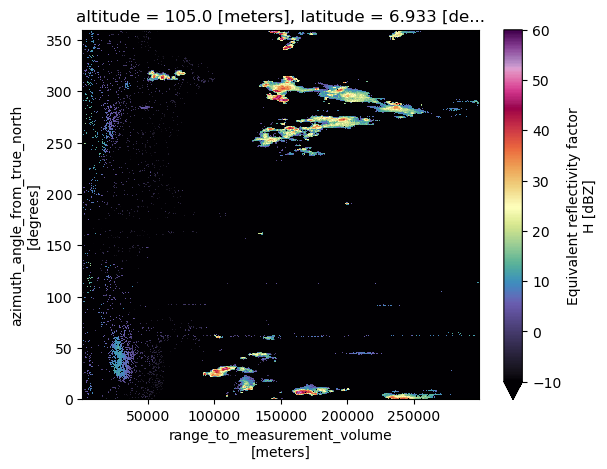

In [17]:
ds.isel(times=0).DBZH.plot(
                           cmap='pyart_ChaseSpectral', 
                           vmin=-10, 
                           vmax=60)

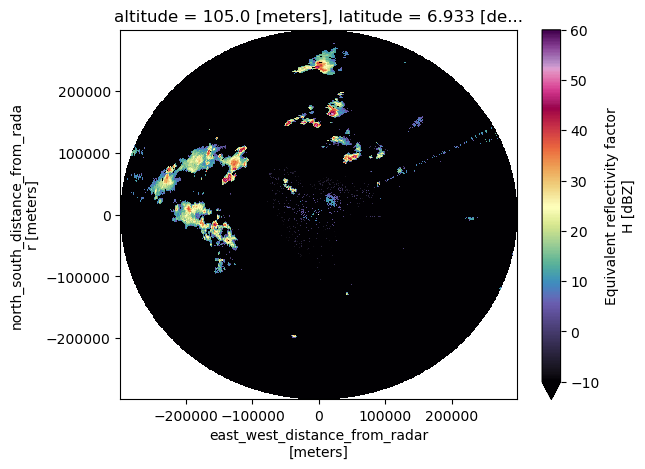

In [4]:
ds.isel(times=0).DBZH.plot(x='x', 
                           y='y', 
                           cmap='pyart_ChaseSpectral', 
                           vmin=-10, 
                           vmax=60)

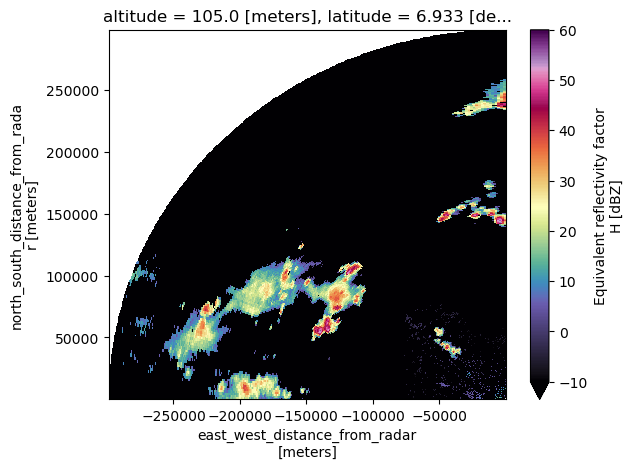

In [5]:
ds.isel(times=0).sel(azimuth=slice(270, 360)).DBZH.plot(x='x', 
                           y='y', 
                           cmap='pyart_ChaseSpectral', 
                           vmin=-10, 
                           vmax=60)

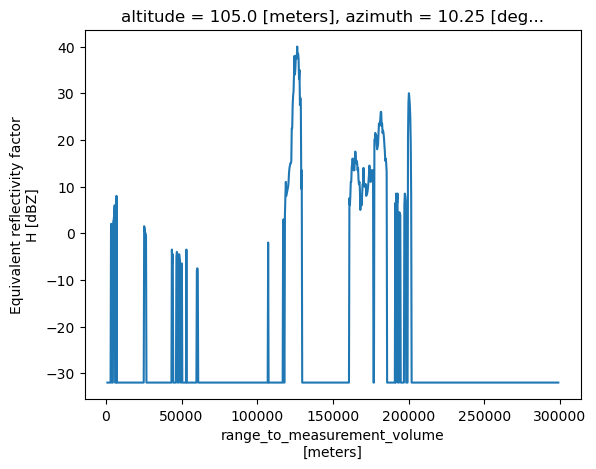

In [6]:
ds.isel(times=0).sel(azimuth=10, method='nearest').DBZH.plot()

In [ ]:
ds